# Analisis Pola Curah Hujan Berdasarkan Data Stasiun

Contact Pearson : Siztia Rizki A / siztiarizki@gmail.com

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [10]:
def harmonic_analysis(data):
    
    #import data
    data = pd.read_excel('data/'+data+'.xlsx')
    data['bulan']=data.iloc[:,1]
    data['tahun']=data.iloc[:,2]
    data.head()
    
    #mengambil data hanya curah hujan dan tanggal
    ch = data[['tahun', 'bulan', 'RR']]
    
    #ganti nilai 8888 menjadi 0
    ch.replace(8888, 0, inplace=True)
    #drop nilai nan
    ch.dropna()
    
    #merata ratakan berdasarkan bulan
    ch_mean = ch.groupby('bulan').mean()
    ch_mean = ch_mean[['RR']]
    
    #normalisasi data
    avg = np.mean(ch_mean)
    std = np.std(ch_mean)
    ch_norm = (ch_mean-avg)/std
    d1 = ch_norm['RR']
    
    #memasukan data ke dalam rumus harmonic analis
    t = np.linspace(0, d1.size, d1.size)

    n = len(d1)
    q = n/2
    q= int(q)
    A=np.empty([q])
    B=np.empty([q])

    for k in range(1,int(np.fix(n/2))+1):
        x1 = d1*np.cos(2*np.pi*k*t/n)
        A[k-1]=(2/n)*sum(x1);

    for k in range(1,int(np.fix(n/2))+1):
        x2 = d1*np.sin(2*np.pi*k*t/n)
        B[k-1]=(2/n)*sum(x2);

    C=sqrt((A**2)+(B**2))
    theta=t[0:q]*nan
    theta[A>0.0]=np.arctan(B[A>0.0]/A[A>0.0])
    theta[A<0.0]=np.arctan(B[A<0.0]/A[A<0.0])+np.pi
    theta[A==0.0]=np.pi/2


    yi=np.empty([q,d1.size])
    yi=matrix.transpose(yi)
    for k in range(0,int(np.fix(n/2))):
        yi[:,k-1]=(C[k-1]*cos((2*pi*k*t/n) - (theta[k-1]))); #rumus persamaan gelombang
    
    return k, C, yi, q, d1


## Plot Data Stasiun Kaharudin

In [25]:
k, C, yi, q, d1 = harmonic_analysis('kaharudin')

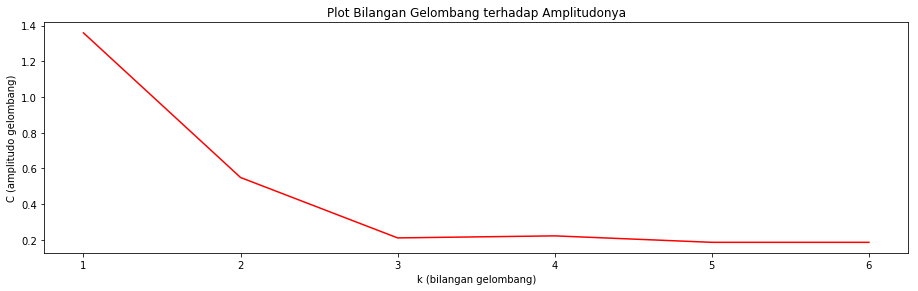

In [26]:
k=np.linspace(1,q,q)
fig9 = plt.figure()
ax2 = fig9.add_axes([0, 1, 2, 0.8]) 

ax2.plot(k,C, 'r')
ax2.set_xlabel('k (bilangan gelombang)')
ax2.set_ylabel('C (amplitudo gelombang)')
ax2.set_title('Plot Bilangan Gelombang terhadap Amplitudonya')

show()

Dapat dilihat bahwa k yang paling besar yaitu 1, dengan begitu bilangan gelombang yang paling mempengaruhi pola gelombang di staiun kaharudin yaitu bilangan gelombang 1

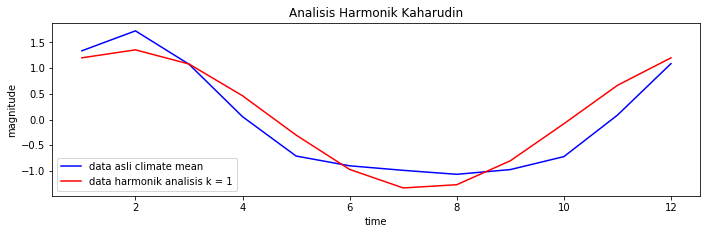

In [32]:
fig1 = plt.figure()
ax3 = fig1.add_axes([0, 3, 1.5, 0.6])

ax3.plot(d1, 'b')
ax3.plot(d1.index, yi[:,1-1], 'r')
ax3.set_xlabel('time')
ax3.set_ylabel('magnitude')
ax3.set_title('Analisis Harmonik Kaharudin')
ax3.legend(["data asli climate mean", "data harmonik analisis k = 1"],loc=0)

fig1.savefig('Hasil Plot/kaharudin.png', transparent=True, bbox_inches='tight')

show()

# Plot Data Stasiun Bali

In [33]:
k, C, yi, q, d1 = harmonic_analysis('bali')

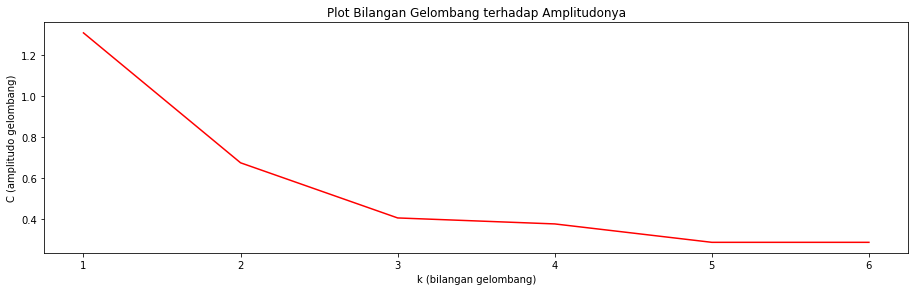

In [34]:
k=np.linspace(1,q,q)
fig9 = plt.figure()
ax2 = fig9.add_axes([0, 1, 2, 0.8]) 

ax2.plot(k,C, 'r')
ax2.set_xlabel('k (bilangan gelombang)')
ax2.set_ylabel('C (amplitudo gelombang)')
ax2.set_title('Plot Bilangan Gelombang terhadap Amplitudonya')

show()

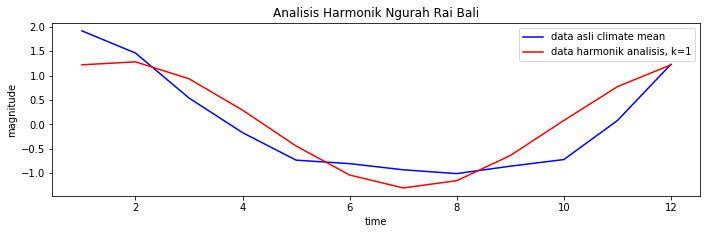

In [35]:
fig1 = plt.figure()
ax3 = fig1.add_axes([0, 3, 1.5, 0.6])

ax3.plot(d1, 'b')
ax3.plot(d1.index, yi[:,1-1], 'r')
ax3.set_xlabel('time')
ax3.set_ylabel('magnitude')
ax3.set_title('Analisis Harmonik Ngurah Rai Bali')
ax3.legend(["data asli climate mean", "data harmonik analisis, k=1"],loc=0)

show()

fig1.savefig('Hasil Plot/Ngurah Rai Bali.png', transparent=True, bbox_inches='tight')

## Plot Stasiun NTB

In [36]:
k, C, yi, q, d1 = harmonic_analysis('ntb')

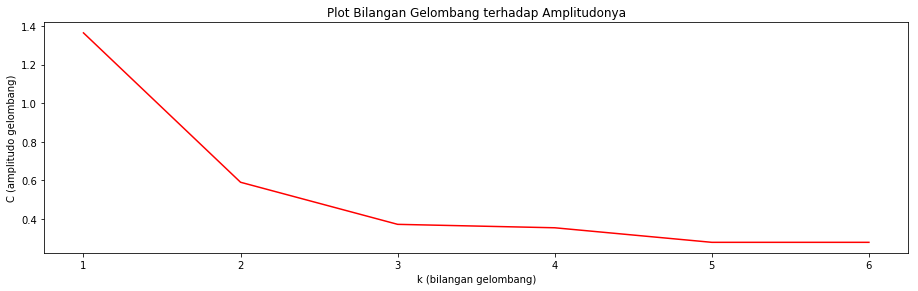

In [37]:
k=np.linspace(1,q,q)
fig9 = plt.figure()
ax2 = fig9.add_axes([0, 1, 2, 0.8]) 

ax2.plot(k,C, 'r')
ax2.set_xlabel('k (bilangan gelombang)')
ax2.set_ylabel('C (amplitudo gelombang)')
ax2.set_title('Plot Bilangan Gelombang terhadap Amplitudonya')

show()

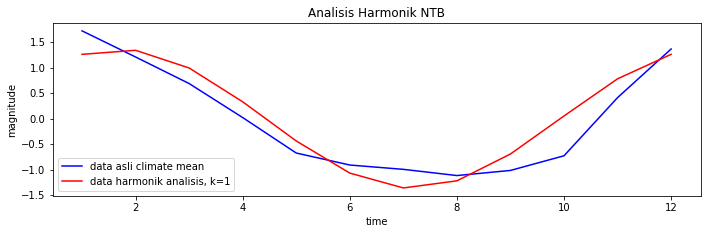

In [39]:
fig1 = plt.figure()
ax3 = fig1.add_axes([0, 3, 1.5, 0.6])

ax3.plot(d1, 'b')
ax3.plot(d1.index, yi[:,1-1], 'r')
# ax3.plot(yi[:,4-1], 'g')
ax3.set_xlabel('time')
ax3.set_ylabel('magnitude')
ax3.set_title('Analisis Harmonik NTB')
ax3.legend(["data asli climate mean", "data harmonik analisis, k=1"],loc=0)

show()

fig1.savefig('Hasil Plot/NTB.png', transparent=True, bbox_inches='tight')

Dari hasil plot tersebut dapat disimpulkan bahwa dari ketiga stasiun memiliki pola yang hampir sama, dengan bilangan gelombang yang paling mempengaruhi yaitu 1, yang artinya bahwa pola cuaca yang paling mempengaruhi yaitu pola cuaca anual (tahunan)